# Melbourne Housing Market

### Data set: 
https://www.kaggle.com/anthonypino/melbourne-housing-market<br>
(Retrieved 22 March 2018)

### Problem Statement: 

The dataset has details about the transaction history of the Melbourne housing market. Would there be trends that we can see, and would we be able to predict the price of a house in Melbourne.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
path = './Melbourne_housing_FULL.csv'
housing = pd.read_csv(path)

#### Some Key Details about the data

**Suburb:** Suburb  
**Address:** Address  
**Rooms:** Number of rooms  
**Price:** Price in dollars  
**Method:** S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.  
**Type:** br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.  
**SellerG:** Real Estate Agent  
**Date:** Date sold  
**Distance:** Distance from CBD  
**Regionname:** General Region (West, North West, North, North east ...etc)  
**Propertycount:** Number of properties that exist in the suburb.  
**Bedroom2:** Scraped # of Bedrooms (from different source)  
**Bathroom:** Number of Bathrooms  
**Car:** Number of carspots  
**Landsize:** Land Size  
**BuildingArea:** Building Size  
**YearBuilt:** Year the house was built  
**CouncilArea:** Governing council for the area  
**Lattitude**  
**Longtitude** 

In [4]:
type(housing)

pandas.core.frame.DataFrame

In [5]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
housing.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.289885,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.328178,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [8]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Cleaning the data and exploratory data analysis

- With our objective of predicting price in mind, we are dropping the data rows where "Price" is not available.

In [9]:
df = housing[housing.Price.notnull()]

In [10]:
# Creating a new column "price_thousands" so that the figures are easier to handle

price_thousands = pd.Series(df.Price/1000, name='price_thousands')
df = pd.concat([df, price_thousands], axis=1)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_thousands
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,1480.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,1035.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,1465.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,850.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1600.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,0.0,181.0,NaN,NaN,Yarra City Council,-37.80410,144.99530,Northern Metropolitan,4019.0,941.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0,1876.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0,1636.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,1000.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,745.0


**Analysing the distribution plot of "Price"**

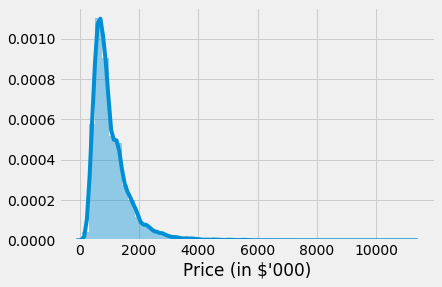

In [11]:
sns.distplot(df.price_thousands, axlabel="Price (in $'000)")

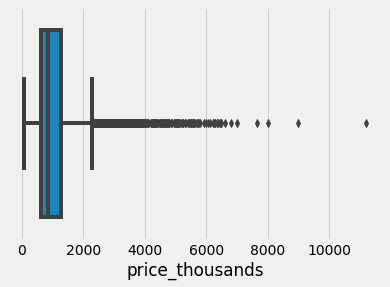

In [12]:
sns.boxplot(x=df.price_thousands)

Taking a look into the outliers above $8,000K:

In [13]:
df[price_thousands>8000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_thousands
19583,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,...,1.0,744.0,117.0,1960.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,9000.0
25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,10.5,3186.0,...,2.0,1400.0,NaN,NaN,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0,11200.0


In [14]:
# Dropping the above outliers from our analysis

df.drop(df[price_thousands>8000].index, inplace=True)

**Analysing numerical figures**

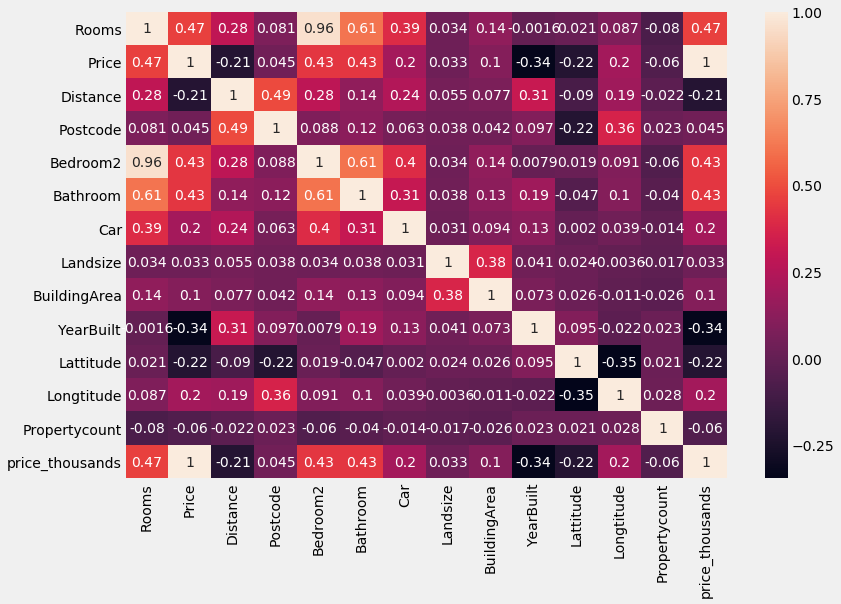

In [15]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [16]:
df.isnull().sum()

Suburb                 0
Address                0
Rooms                  0
Type                   0
Price                  0
Method                 0
SellerG                0
Date                   0
Distance               1
Postcode               1
Bedroom2            6441
Bathroom            6447
Car                 6824
Landsize            9265
BuildingArea       16590
YearBuilt          15162
CouncilArea            3
Lattitude           6254
Longtitude          6254
Regionname             3
Propertycount          3
price_thousands        0
dtype: int64

- "Bedroom2" and "Bathroom" have a number of 'null' cells, and "Rooms" have a higher correlation to "Price"
- "Lattitude" and "Longtitude" are very similar to distance and have a number of 'null' cells

Dropping the above columns for analysis, as well as "Address" and "SellerG"

For the remaining columns, will be dropping the rows with 'null' values from the dataframe since the dataset is still quite substantial

In [17]:
df.drop(axis=1,labels=['Bedroom2','Bathroom','Lattitude','Longtitude','SellerG','Address'], inplace=True)
df.dropna(axis=0, subset=['Car','Landsize','BuildingArea','Distance','Regionname','Propertycount','YearBuilt'], inplace=True)

In [18]:
df.reset_index()

,index,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,price_thousands
0,2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,3067.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0,1035.0
1,4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0,1465.0
2,6,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0,1600.0
3,11,Abbotsford,3,h,1876000.0,S,7/05/2016,2.5,3067.0,0.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,4019.0,1876.0
4,14,Abbotsford,2,h,1636000.0,S,8/10/2016,2.5,3067.0,2.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,4019.0,1636.0
5,18,Abbotsford,2,h,1097000.0,S,8/10/2016,2.5,3067.0,2.0,220.0,75.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0,1097.0
6,24,Abbotsford,3,h,1350000.0,VB,12/11/2016,2.5,3067.0,2.0,214.0,190.0,2005.0,Yarra City Council,Northern Metropolitan,4019.0,1350.0
7,25,Abbotsford,2,u,750000.0,S,12/11/2016,2.5,3067.0,1.0,0.0,94.0,2009.0,Yarra City Council,Northern Metropolitan,4019.0,750.0
8,30,Abbotsford,2,h,1310000.0,S,15/10/2016,2.5,3067.0,2.0,238.0,97.0,1890.0,Yarra City Council,Northern Metropolitan,4019.0,1310.0
9,32,Abbotsford,3,h,1200000.0,S,16/07/2016,2.5,3067.0,1.0,113.0,110.0,1880.0,Yarra City Council,Northern Metropolitan,4019.0,1200.0


In [19]:
# Converting to date-time

df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# Creating a new column to capture the age of the building

df['year'] = pd.DatetimeIndex(df['Date']).year

In [21]:
df['age'] = df['year'] - df['YearBuilt']

In [22]:
# Converting other variables to categorical

df['Suburb'] = pd.factorize(df.Suburb)[0]
df['Type'] = pd.factorize(df.Type)[0]
df['Method'] = pd.factorize(df.Method)[0]
df['CouncilArea'] = pd.factorize(df.CouncilArea)[0]
df['Postcode'] = pd.factorize(df.Postcode)[0]   
df['Regionname'] = pd.factorize(df.Regionname)[0]

In [23]:
df.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Date               0
Distance           0
Postcode           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea        0
Regionname         0
Propertycount      0
price_thousands    0
year               0
age                0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8894 entries, 2 to 34856
Data columns (total 18 columns):
Suburb             8894 non-null int64
Rooms              8894 non-null int64
Type               8894 non-null int64
Price              8894 non-null float64
Method             8894 non-null int64
Date               8894 non-null datetime64[ns]
Distance           8894 non-null float64
Postcode           8894 non-null int64
Car                8894 non-null float64
Landsize           8894 non-null float64
BuildingArea       8894 non-null float64
YearBuilt          8894 non-null float64
CouncilArea        8894 non-null int64
Regionname         8894 non-null int64
Propertycount      8894 non-null float64
price_thousands    8894 non-null float64
year               8894 non-null int64
age                8894 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(8)
memory usage: 1.3 MB


In [25]:
df.describe()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,price_thousands,year,age
count,8894.000000,8894.000000,8894.000000,8.894000e+03,8894.00000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000
mean,92.781651,3.098831,0.336519,1.091635e+06,0.72993,11.201282,62.594558,1.692714,523.370362,149.299339,1965.778053,10.280526,1.441534,7473.819879,1091.635122,2016.724309,50.946256
std,68.274248,0.963644,0.621750,6.740486e+05,1.09748,6.815020,41.020843,0.975420,1060.997910,87.902840,37.057087,7.006134,1.284508,4374.426151,674.048616,0.657116,36.988616
min,0.000000,1.000000,0.000000,1.310000e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,0.000000,249.000000,131.000000,2016.000000,-2.000000
25%,40.000000,2.000000,0.000000,6.402500e+05,0.00000,6.400000,31.000000,1.000000,212.000000,100.000000,1945.000000,4.000000,0.000000,4380.000000,640.250000,2016.000000,17.000000
50%,80.000000,3.000000,0.000000,9.000000e+05,0.00000,10.200000,58.000000,2.000000,477.500000,132.000000,1970.000000,10.000000,1.000000,6567.000000,900.000000,2017.000000,47.000000
75%,127.000000,4.000000,1.000000,1.345000e+06,1.00000,13.900000,85.000000,2.000000,652.000000,180.000000,2000.000000,15.000000,2.000000,10331.000000,1345.000000,2017.000000,71.000000
max,314.000000,12.000000,2.000000,8.000000e+06,4.00000,47.400000,193.000000,10.000000,42800.000000,3112.000000,2019.000000,32.000000,7.000000,21650.000000,8000.000000,2018.000000,821.000000


In [26]:
df.nunique()

Suburb              315
Rooms                10
Type                  3
Price              1846
Method                5
Date                 77
Distance            201
Postcode            194
Car                  11
Landsize           1238
BuildingArea        593
YearBuilt           143
CouncilArea          33
Regionname            8
Propertycount       312
price_thousands    1846
year                  3
age                 148
dtype: int64

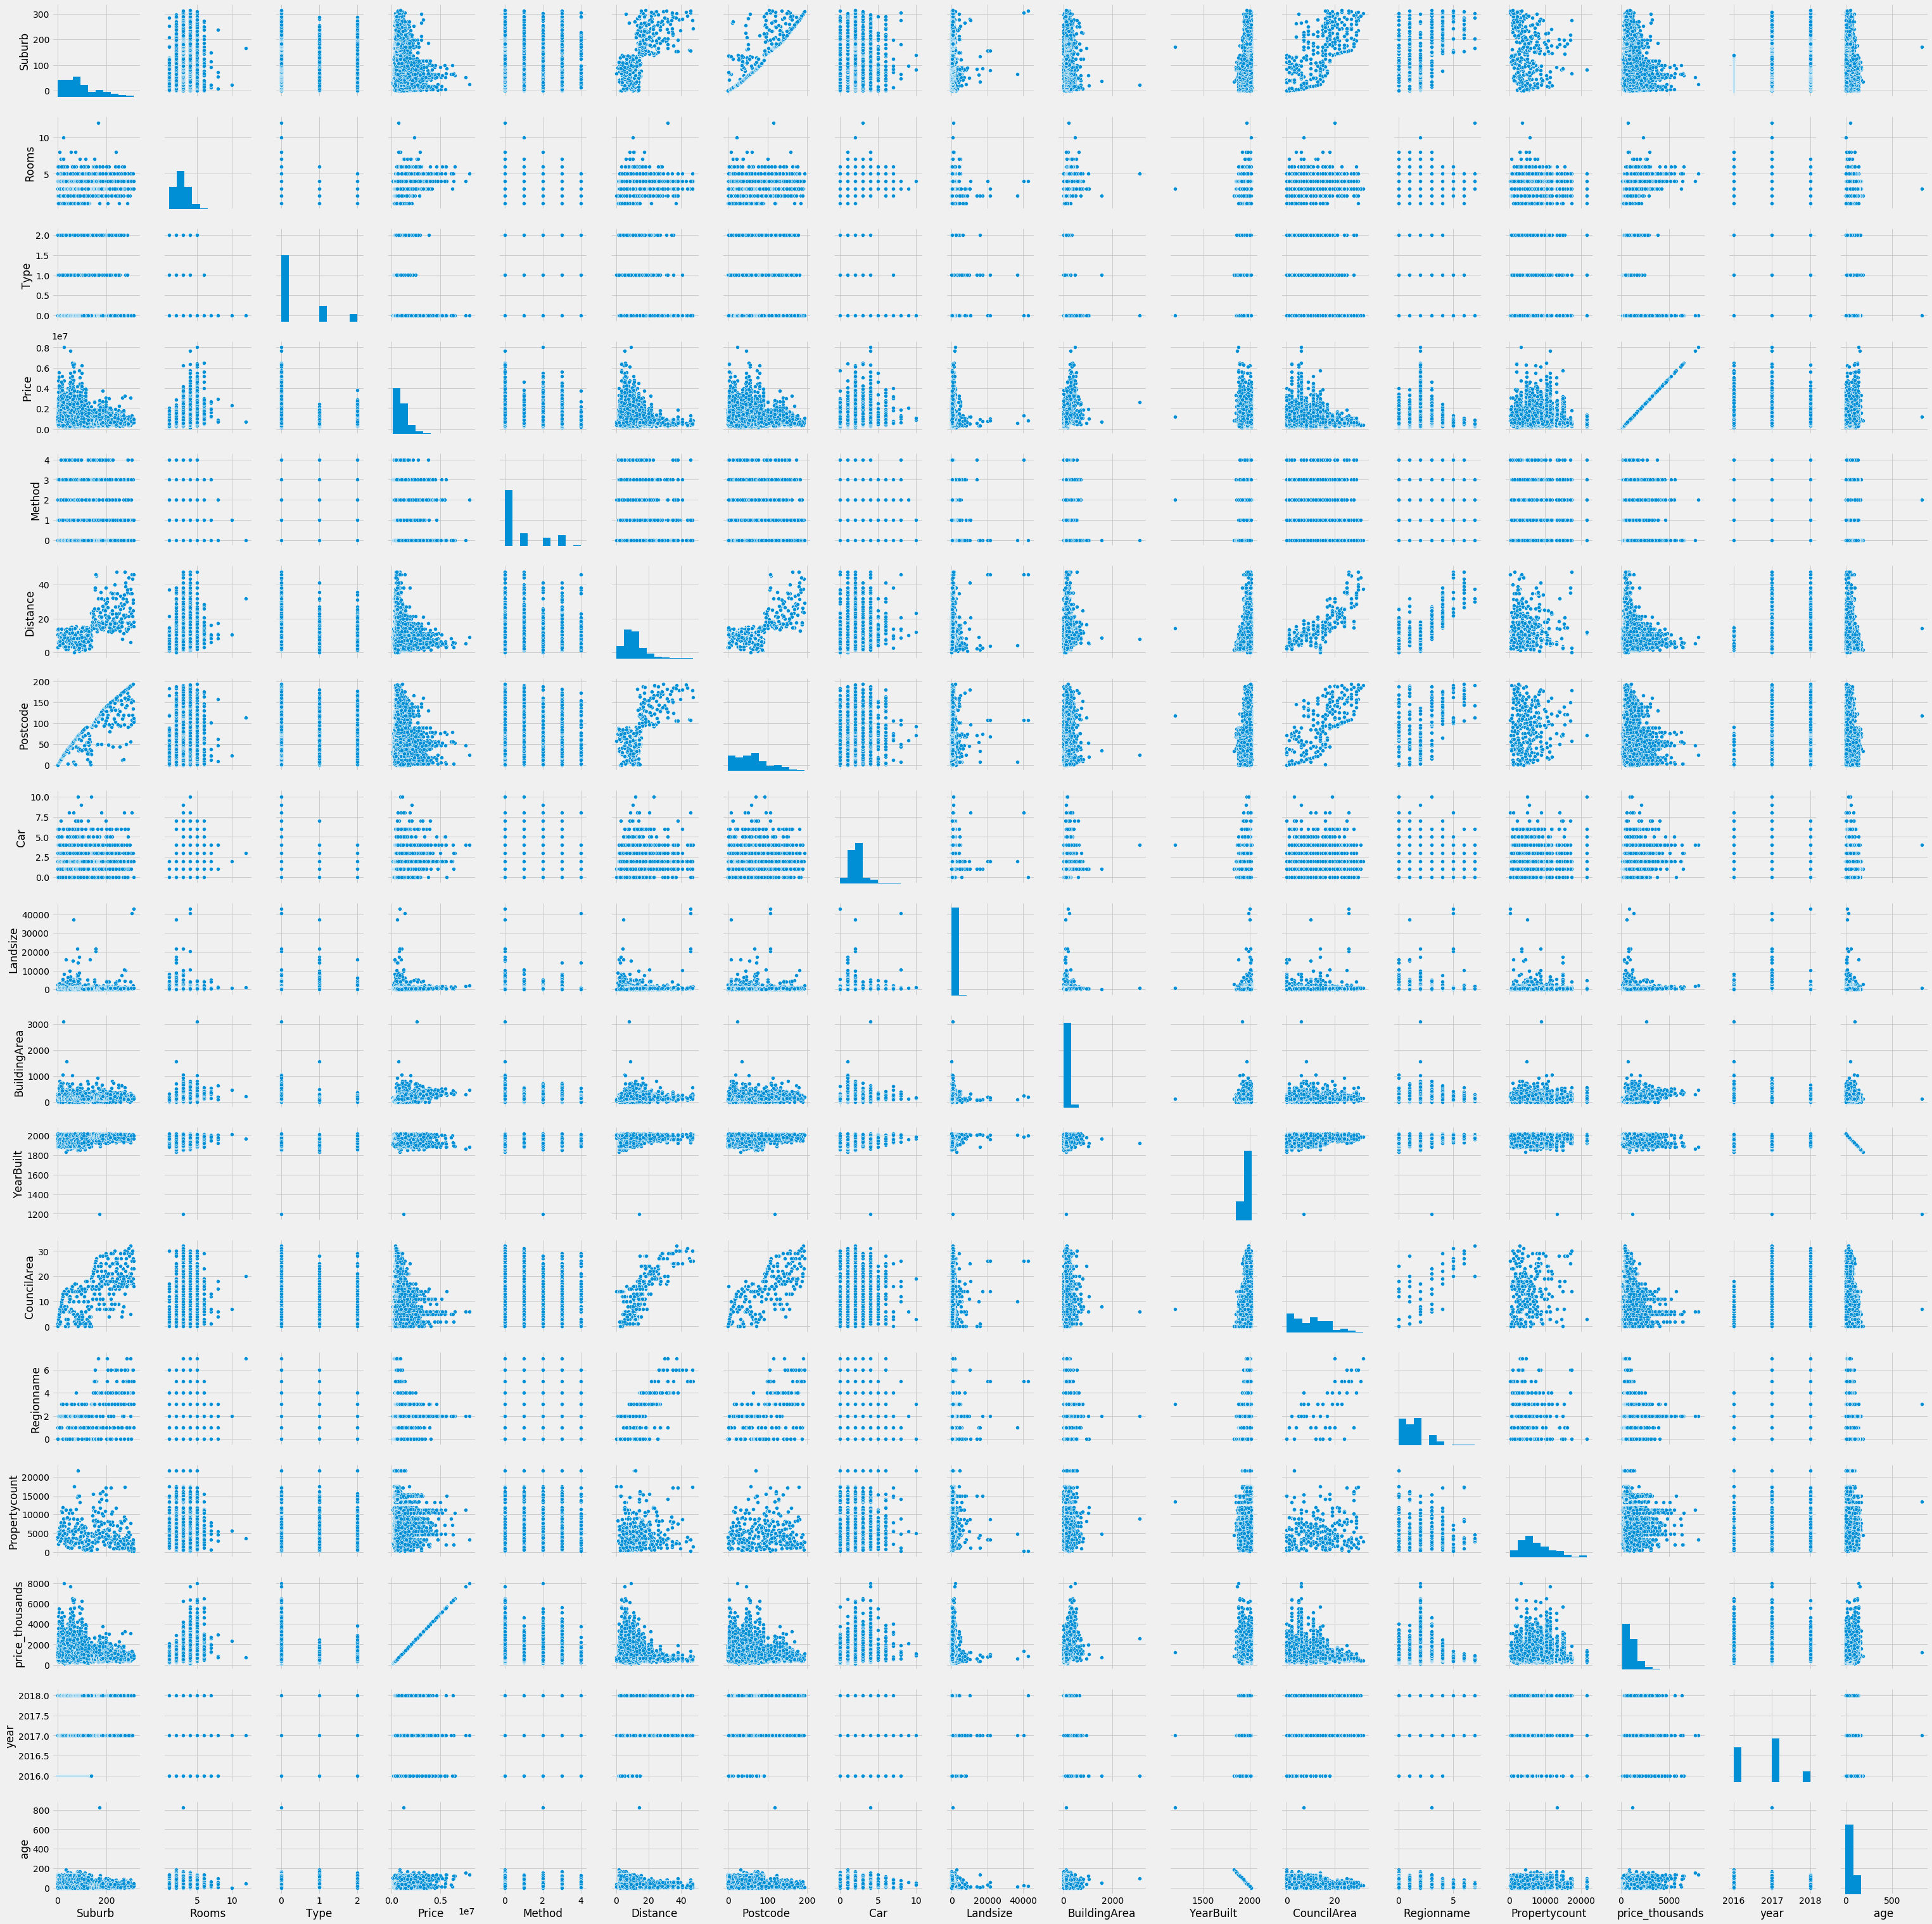

In [27]:
sns.pairplot(df)

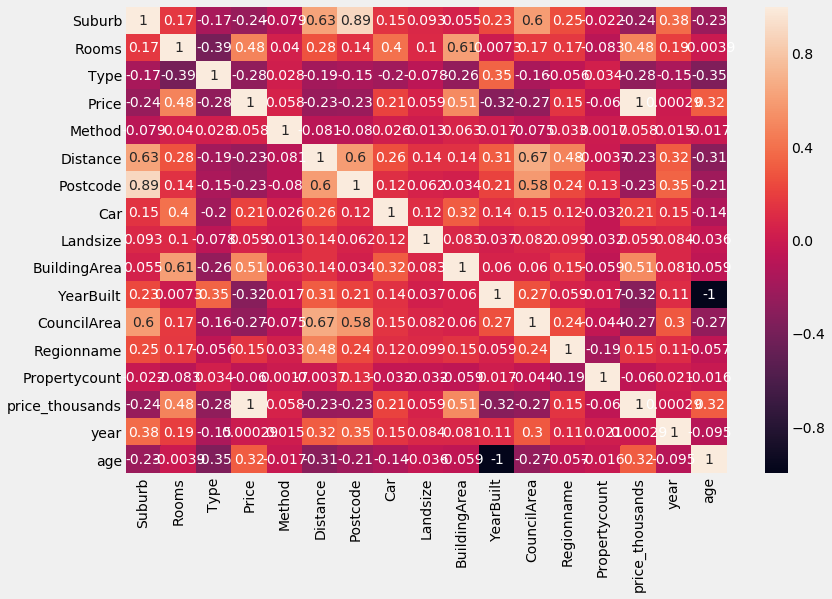

In [28]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

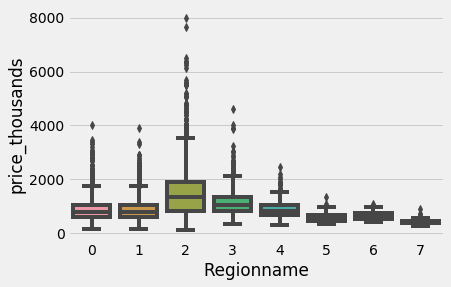

In [29]:
sns.boxplot(x=df.Regionname, y=df.price_thousands)

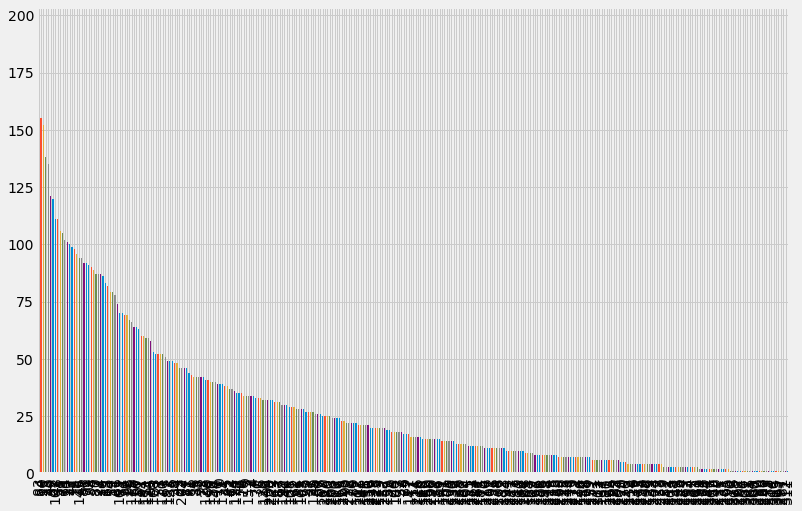

In [30]:
df.Suburb.value_counts().plot(kind='bar', figsize=(12,8))

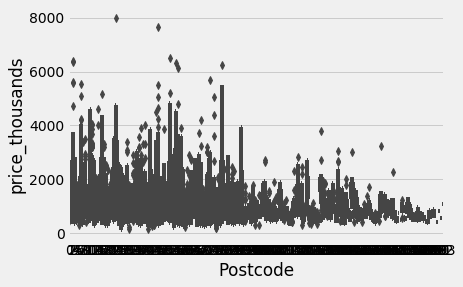

In [31]:
sns.boxplot(x = 'Postcode', y = 'price_thousands', data = df)

In [32]:
# Dummy encoding for 'Region'

region_dummies = pd.get_dummies(df.Regionname, prefix='region')
region_dummies.drop(region_dummies.columns[0], axis=1, inplace=True)
region_dummies.columns = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
df_dummies = pd.concat([df, region_dummies], axis=1)

In [33]:
df_dummies.head(10)

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Car,Landsize,...,price_thousands,year,age,region1,region2,region3,region4,region5,region6,region7
2,0,2,0,1035000.0,0,2016-04-02,2.5,0,0.0,156.0,...,1035.0,2016,116.0,0,0,0,0,0,0,0
4,0,3,0,1465000.0,1,2017-04-03,2.5,0,0.0,134.0,...,1465.0,2017,117.0,0,0,0,0,0,0,0
6,0,4,0,1600000.0,2,2016-04-06,2.5,0,2.0,120.0,...,1600.0,2016,2.0,0,0,0,0,0,0,0
11,0,3,0,1876000.0,0,2016-07-05,2.5,0,0.0,245.0,...,1876.0,2016,106.0,0,0,0,0,0,0,0
14,0,2,0,1636000.0,0,2016-08-10,2.5,0,2.0,256.0,...,1636.0,2016,126.0,0,0,0,0,0,0,0
18,0,2,0,1097000.0,0,2016-08-10,2.5,0,2.0,220.0,...,1097.0,2016,116.0,0,0,0,0,0,0,0
24,0,3,0,1350000.0,2,2016-12-11,2.5,0,2.0,214.0,...,1350.0,2016,11.0,0,0,0,0,0,0,0
25,0,2,1,750000.0,0,2016-12-11,2.5,0,1.0,0.0,...,750.0,2016,7.0,0,0,0,0,0,0,0
30,0,2,0,1310000.0,0,2016-10-15,2.5,0,2.0,238.0,...,1310.0,2016,126.0,0,0,0,0,0,0,0
32,0,3,0,1200000.0,0,2016-07-16,2.5,0,1.0,113.0,...,1200.0,2016,136.0,0,0,0,0,0,0,0


### 1. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.price_thousands
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    print("Feature columns", feature_cols)
    print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [37]:
# Linear regression with all features (dummy encoding)

feature_cols = ['Rooms', 'Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Suburb', 'Type', 'Method', 'CouncilArea','Postcode', 'year', 'age', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)


('Feature columns', ['Rooms', 'Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Suburb', 'Type', 'Method', 'CouncilArea', 'Postcode', 'year', 'age', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 1.7730822575005472e-13)


In [38]:
# Linear regression with all features (no dummy encoding)

feature_cols = ['Rooms', 'Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Suburb', 'Type', 'Method', 'CouncilArea','Postcode', 'year', 'age', 'Regionname']
train_test_rmse(df_dummies, feature_cols)


('Feature columns', ['Rooms', 'Price', 'Distance', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'Suburb', 'Type', 'Method', 'CouncilArea', 'Postcode', 'year', 'age', 'Regionname'])
('RMSE', 6.707396062115012e-13)


In [39]:
# Linear regression with a selected group of features

feature_cols = ['Rooms', 'YearBuilt', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'YearBuilt', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 467.1171936101002)


In [40]:
feature_cols = ['Rooms', 'YearBuilt', 'Regionname']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'YearBuilt', 'Regionname'])
('RMSE', 531.843232010548)


In [41]:
feature_cols = ['Rooms', 'age', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 493.8655655364518)


In [42]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'Postcode', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'Postcode', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 455.0150249012324)


In [43]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'Postcode']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'Postcode'])
('RMSE', 523.4564346544935)


In [44]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'Suburb', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'Suburb', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 441.25162966454667)


In [45]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'Suburb']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'Suburb'])
('RMSE', 529.5921467753068)


In [46]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'CouncilArea', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'CouncilArea', 'region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7'])
('RMSE', 404.3041628734309)


In [47]:
feature_cols = ['Rooms', 'age', 'BuildingArea', 'CouncilArea']
train_test_rmse(df_dummies, feature_cols)

('Feature columns', ['Rooms', 'age', 'BuildingArea', 'CouncilArea'])
('RMSE', 477.1316607742809)


Based on the analysis above, seems that feature columns with 
- "Rooms"
- "Age"
- "BuildingArea"
- "CouncilArea" (categorical)
- "Region" (dummy encoded)

yield the best model.

However, RMSE of the models are rather high, rendering the model ineffective. 

### 2. Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,price_thousands,year,age
2,0,2,0,1035000.0,0,2016-04-02,2.5,0,0.0,156.0,79.0,1900.0,0,0,4019.0,1035.0,2016,116.0
4,0,3,0,1465000.0,1,2017-04-03,2.5,0,0.0,134.0,150.0,1900.0,0,0,4019.0,1465.0,2017,117.0
6,0,4,0,1600000.0,2,2016-04-06,2.5,0,2.0,120.0,142.0,2014.0,0,0,4019.0,1600.0,2016,2.0
11,0,3,0,1876000.0,0,2016-07-05,2.5,0,0.0,245.0,210.0,1910.0,0,0,4019.0,1876.0,2016,106.0
14,0,2,0,1636000.0,0,2016-08-10,2.5,0,2.0,256.0,107.0,1890.0,0,0,4019.0,1636.0,2016,126.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8894 entries, 2 to 34856
Data columns (total 18 columns):
Suburb             8894 non-null int64
Rooms              8894 non-null int64
Type               8894 non-null int64
Price              8894 non-null float64
Method             8894 non-null int64
Date               8894 non-null datetime64[ns]
Distance           8894 non-null float64
Postcode           8894 non-null int64
Car                8894 non-null float64
Landsize           8894 non-null float64
BuildingArea       8894 non-null float64
YearBuilt          8894 non-null float64
CouncilArea        8894 non-null int64
Regionname         8894 non-null int64
Propertycount      8894 non-null float64
price_thousands    8894 non-null float64
year               8894 non-null int64
age                8894 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(8)
memory usage: 1.6 MB


In [51]:
# Defining feature columns

feature_cols = df.columns.drop(labels = ['Price','Date','price_thousands'])
feature_cols

Index([u'Suburb', u'Rooms', u'Type', u'Method', u'Distance', u'Postcode',
       u'Car', u'Landsize', u'BuildingArea', u'YearBuilt', u'CouncilArea',
       u'Regionname', u'Propertycount', u'year', u'age'],
      dtype='object')

In [52]:
X = df[feature_cols]
y = df.price_thousands

In [53]:
X.head()

,Suburb,Rooms,Type,Method,Distance,Postcode,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,year,age
2,0,2,0,0,2.5,0,0.0,156.0,79.0,1900.0,0,0,4019.0,2016,116.0
4,0,3,0,1,2.5,0,0.0,134.0,150.0,1900.0,0,0,4019.0,2017,117.0
6,0,4,0,2,2.5,0,2.0,120.0,142.0,2014.0,0,0,4019.0,2016,2.0
11,0,3,0,0,2.5,0,0.0,245.0,210.0,1910.0,0,0,4019.0,2016,106.0
14,0,2,0,0,2.5,0,2.0,256.0,107.0,1890.0,0,0,4019.0,2016,126.0


In [54]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [55]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
13,year,0.006785
3,Method,0.008721
6,Car,0.021384
12,Propertycount,0.024426
0,Suburb,0.029221
5,Postcode,0.032092
2,Type,0.034313
9,YearBuilt,0.064255
7,Landsize,0.068956
14,age,0.084559


In [56]:
# Compute the out-of-bag R-squared score.

print((rfreg.oob_score_))

# Find the average RMSE.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.8411299994419495


278.92025532935327

**Tuning the model**

In [57]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

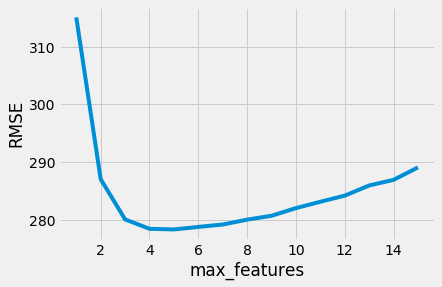

In [58]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE');

In [59]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

(278.40036791824747, 5)

## Conclusion

- Random forest model provides a better predictor, with a lower RMSE score (278.4) compared to linear regression (404.3)
- Max features = 5 yields the most optimal results at a n-estimator of 150

### Next steps

- Fine tuning of both linear regression and random forest models
- Implementing cross validation for linear regression
- Explore various further models (e.g. SVM)
